    age  bilirubin  alk_phosphate   sgot  albumin  protime
5    34        0.9           95.0   28.0      4.0     75.0
10   39        1.3           78.0   30.0      4.4     85.0
11   32        1.0           59.0  249.0      3.7     54.0
12   41        0.9           81.0   60.0      3.9     52.0
13   30        2.2           57.0  144.0      4.9     78.0
15   38        2.0           72.0   89.0      2.9     46.0
17   40        0.6           62.0  166.0      4.0     63.0
18   38        0.7           53.0   42.0      4.1     85.0
19   38        0.7           70.0   28.0      4.2     62.0
20   22        0.9           48.0   20.0      4.2     64.0
21   27        1.2          133.0   98.0      4.1     39.0
22   31        1.0           85.0   20.0      4.0    100.0
23   42        0.9           60.0   63.0      4.7     47.0


C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVC(C=1, kernel='poly')
Train Accuracy: 0.2857142857142857
Train Precision: 0.29894053315105945
Train Recall: 0.2857142857142857
Train F1-score: 0.23744306418219457
Test Accuracy: 0.041666666666666664
Test Precision: 0.006944444444444444
Test Recall: 0.041666666666666664
Test F1-score: 0.011904761904761904
Число опорных векторов: 56


C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfifz\PycharmPr

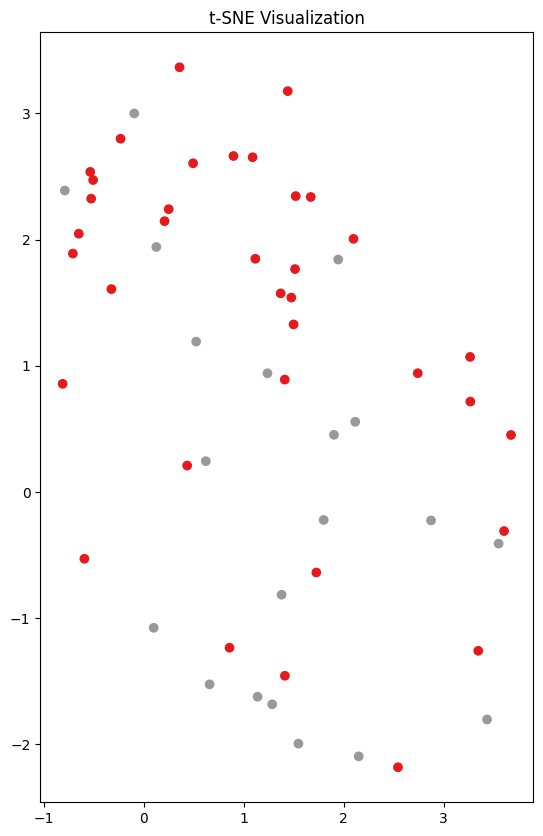

C:\Users\cfifz\AppData\Local\Temp\ipykernel_20452\3718372031.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap=plt.cm.get_cmap("Set1", 2))


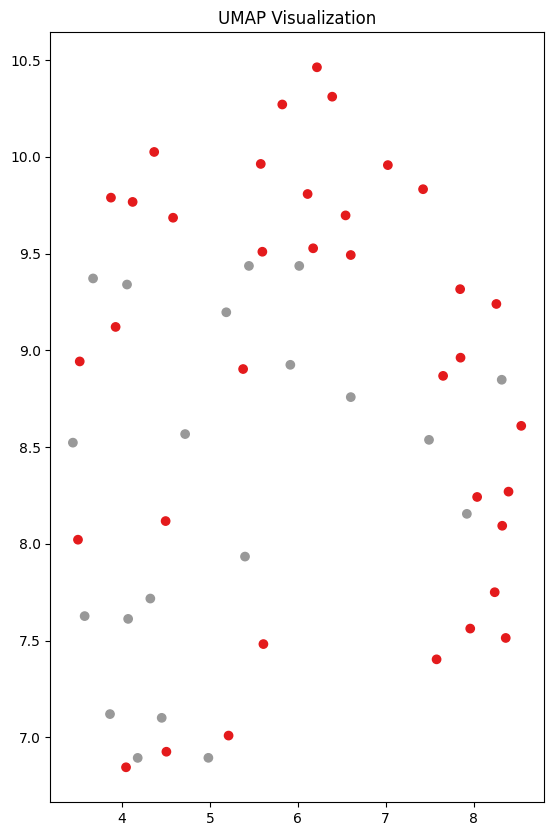

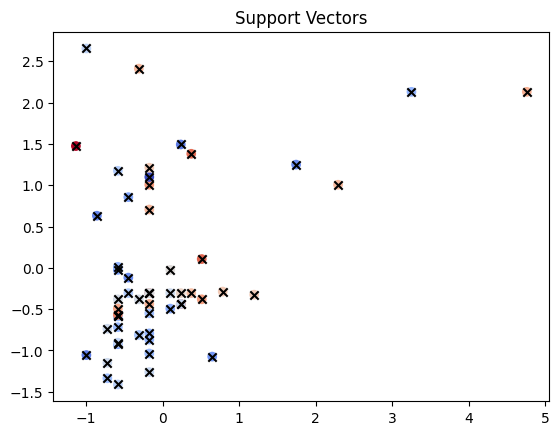

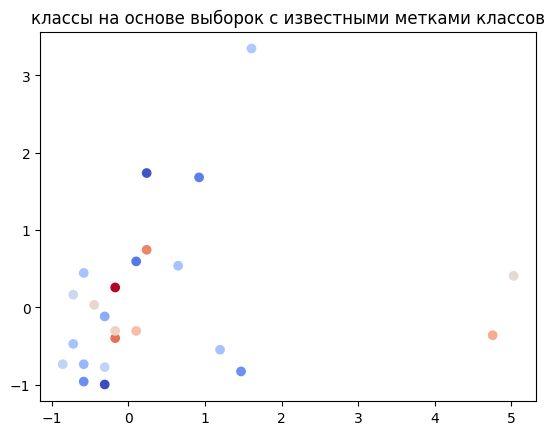

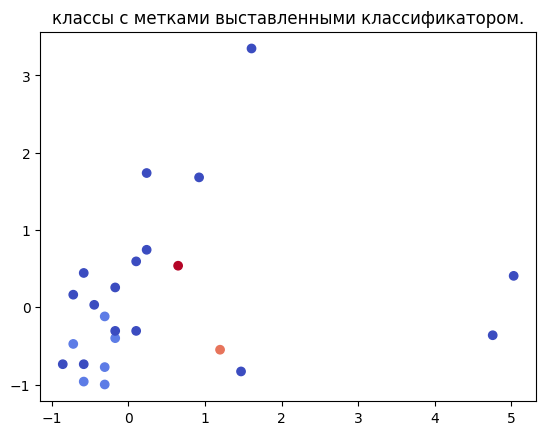

In [4]:
import numpy as np
import pandas as pd
import umap.umap_ as umap
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('hepatitis.csv')
data = data.dropna()
data = data.select_dtypes(include=[np.number])
print(data.head(13))

X = data[['sgot','albumin']]
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = SVC()
model.fit(X_train, y_train)

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(model, param_grid, cv=2)
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_
print(best_classifier)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')

precision_train = precision_score(y_train, y_train_pred, average='weighted')
precision_test = precision_score(y_test, y_test_pred, average='weighted')

f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
num_support_vectors = best_classifier.support_vectors_.shape[0]
print('Train Accuracy:', accuracy_train)
print('Train Precision:', precision_train)
print('Train Recall:', recall_train)
print('Train F1-score:', f1_train)

print('Test Accuracy:', accuracy_test)
print('Test Precision:', precision_test)
print('Test Recall:', recall_test)
print('Test F1-score:', f1_test)

print(f"Число опорных векторов: {num_support_vectors}")

tsne = TSNE(n_components=2)
umap_ = umap.UMAP(random_state=42)
X_tsne = tsne.fit_transform(X_train)
X_umap = umap_.fit_transform(X_train)

plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=plt.cm.get_cmap("Set1", 2))
plt.title("t-SNE Visualization")
plt.show()


plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap=plt.cm.get_cmap("Set1", 2))
plt.title("UMAP Visualization")
plt.show()




support_vectors = grid_search.best_estimator_.support_vectors_
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='black', marker='x')
plt.title('Support Vectors')
plt.show()


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
plt.title('классы на основе выборок с известными метками классов')
plt.show()

y_pred = model.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm')
plt.title('классы с метками выставленными классификатором.')
plt.show()
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))
